In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = set(zip(lats, lngs))
lat_lngs

{(-83.91252389246183, 149.04219395591542),
 (-57.383265438638574, 103.09555832141075),
 (77.12479285268424, -0.3150061334139309),
 (23.593914563141283, -106.05569866270963),
 (-88.491757159341, 1.136433397280996),
 (44.700017419287434, 64.20127130574767),
 (6.925295446795431, -116.44556090560195),
 (84.29600004476919, 96.83961886271737),
 (68.07514863943058, 13.593955385885096),
 (-48.7994627689154, 143.38095753846017),
 (73.22615682274417, 138.39216685257543),
 (-36.24398304764589, -94.90338953251951),
 (72.87762223990822, -75.75224908818873),
 (-70.72626486135022, 84.49296608116077),
 (-88.01034839911071, -60.07332595526893),
 (-0.6275327468618315, 110.28564955428118),
 (-53.31340019180838, -171.62285459782098),
 (63.87141382943773, -23.979078053734895),
 (-42.59935215602354, 134.80888247935195),
 (-32.783337542711244, 172.02670092255983),
 (81.88455757499781, 109.85713414637985),
 (9.491272160903321, 167.2417479353146),
 (43.96068974654537, 14.680419716761861),
 (3.7388950474150136,

In [25]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [26]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [27]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mackay
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | huarmey
Processing Record 5 of Set 1 | madimba
Processing Record 6 of Set 1 | port augusta
Processing Record 7 of Set 1 | poum
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | utiroa
City not found. Skipping...
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | ermoupolis
Processing Record 19 of Set 1 | morros
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | alta floresta
Processing Record 22 of Set 1 | ushuaia
Pr

Processing Record 35 of Set 4 | channel-port aux basques
Processing Record 36 of Set 4 | kodiak
Processing Record 37 of Set 4 | upernavik
Processing Record 38 of Set 4 | kieta
Processing Record 39 of Set 4 | bugene
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | san ignacio
Processing Record 42 of Set 4 | nassau
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | takoradi
Processing Record 45 of Set 4 | georgetown
Processing Record 46 of Set 4 | acapulco
Processing Record 47 of Set 4 | namatanai
Processing Record 48 of Set 4 | ahipara
Processing Record 49 of Set 4 | akashi
Processing Record 50 of Set 4 | avarua
Processing Record 1 of Set 5 | fushun
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | maryborough
Processing Record 4 of Set 5 | ypsonas
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | castro
Processing Record 8 of Set 5 | kavaratti
Pro

City not found. Skipping...
Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | lolua
City not found. Skipping...
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | donnacona
Processing Record 32 of Set 8 | zlitan
Processing Record 33 of Set 8 | lasem
Processing Record 34 of Set 8 | chuncheng
Processing Record 35 of Set 8 | axim
Processing Record 36 of Set 8 | bairiki
Processing Record 37 of Set 8 | pagudpud
Processing Record 38 of Set 8 | puri
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | zenzeli
Processing Record 41 of Set 8 | los llanos de aridane
Processing Record 42 of Set 8 | rehoboth
Processing Record 43 of Set 8 | lebu
Processing Record 44 of Set 8 | kerouane
Processing Record 45 of Set 8 | wamba
Processing Record 46 of Set 8 | puerto ayacucho
Processing Record 47 of Set 8 | lagunas
Processing Record 48 of Set 8 | san carlos de bariloche
Processing Record 49 of Set 8 | hammerfest
Processing Record 50 of Set 8 | sa

Processing Record 16 of Set 12 | mecca
Processing Record 17 of Set 12 | yerbogachen
Processing Record 18 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 12 | srednekolymsk
Processing Record 20 of Set 12 | dudinka
Processing Record 21 of Set 12 | sataua
City not found. Skipping...
Processing Record 22 of Set 12 | abha
Processing Record 23 of Set 12 | coolum beach
Processing Record 24 of Set 12 | kulhudhuffushi
Processing Record 25 of Set 12 | batsfjord
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | linaon
Processing Record 28 of Set 12 | campbell river
Processing Record 29 of Set 12 | college
Processing Record 30 of Set 12 | husavik
Processing Record 31 of Set 12 | edd
Processing Record 32 of Set 12 | hannibal
Processing Record 33 of Set 12 | atambua
Processing Record 34 of Set 12 | fougamou
Processing Record 35 of Set 12 | martapura
Processing Record 36 of Set 12 | saint-andre-les-vergers
Processing Record 37 of Set 12 | comodoro

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.94,76,72,15.37,PF,2021-09-25 21:03:07
1,Mackay,-21.1500,149.2000,67.05,80,3,3.58,AU,2021-09-25 21:03:08
2,Busselton,-33.6500,115.3333,51.08,89,76,5.23,AU,2021-09-25 21:03:08
3,Huarmey,-10.0681,-78.1522,67.80,75,88,12.53,PE,2021-09-25 21:03:08
4,Madimba,-10.4000,40.3333,72.28,89,0,8.21,TZ,2021-09-25 21:03:09
5,Port Augusta,-32.5000,137.7667,49.71,71,0,6.73,AU,2021-09-25 21:03:09
6,Poum,-20.2333,164.0167,72.39,66,78,7.49,NC,2021-09-25 21:03:10
7,Puerto Ayora,-0.7393,-90.3518,71.11,84,79,9.26,EC,2021-09-25 21:03:10
8,Faanui,-16.4833,-151.7500,78.28,76,12,10.11,PF,2021-09-25 21:03:10
9,Butaritari,3.0707,172.7902,82.89,75,58,10.02,KI,2021-09-25 21:03:11


In [31]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [32]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-09-25 21:03:07,-23.1203,-134.9692,73.94,76,72,15.37
1,Mackay,AU,2021-09-25 21:03:08,-21.1500,149.2000,67.05,80,3,3.58
2,Busselton,AU,2021-09-25 21:03:08,-33.6500,115.3333,51.08,89,76,5.23
3,Huarmey,PE,2021-09-25 21:03:08,-10.0681,-78.1522,67.80,75,88,12.53
4,Madimba,TZ,2021-09-25 21:03:09,-10.4000,40.3333,72.28,89,0,8.21
...,...,...,...,...,...,...,...,...,...
565,Shawnee,US,2021-09-25 21:07:03,39.0500,-95.7669,81.79,38,1,1.99
566,Bani Walid,LY,2021-09-25 21:07:04,31.7566,13.9942,71.98,60,0,10.47
567,Port Hardy,CA,2021-09-25 21:03:16,50.6996,-127.4199,52.81,97,100,5.86
568,Presidencia Roque Saenz Pena,AR,2021-09-25 21:07:04,-26.7852,-60.4388,82.04,26,0,6.44


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

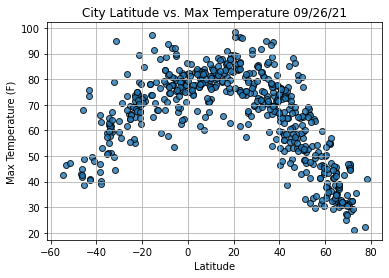

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

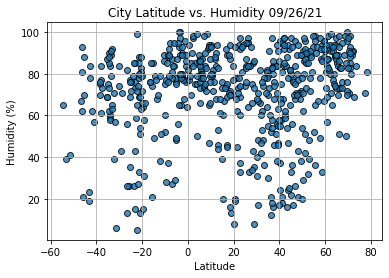

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

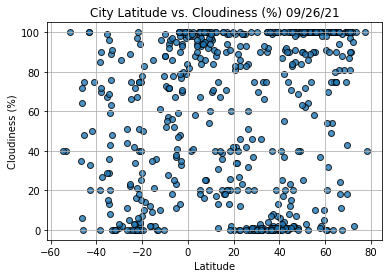

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()